Problem 1: P = 10000 and X = 1

In [15]:
import numpy as np
import matplotlib.pyplot as plt


##experiments prepare
dimension = 2                   #pair 
n_points_per_experiment = 10000 #number of pair/ P=10000
n_experiments = 1               #number of independent experiment/ X=1
points = np.random.uniform(low=-1.0, high=1.0,size=(dimension, n_points_per_experiment,n_experiments, )) #{[(px1,py1),(px2,py2)...(px10000),(py10000)]}


In [24]:
##experiments result calculation
radius = (points**2).sum(axis=0)  #px^2 + py^2
print(radius)
inside_the_circle = (radius <= 1) # how many points in the circle
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) &(-1.0 <= points[1]) & (points[1] <= 1.0)) #how many points inside the square
pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0) #ratio 
pi = 4 * pi_by_4


[[6.20213352e-01]
 [4.16378944e-01]
 [7.10914012e-04]
 ...
 [9.07194627e-01]
 [4.50845155e-01]
 [1.38486468e+00]]


In [17]:
##experiment analysis
average = pi.mean()
uncertainty = pi.std()
average = pi.mean()
uncertainty = pi.std()
print(f'pi ={average} ± {uncertainty}')

pi =3.1228 ± 0.0


In [18]:

#• Compute the mean and standard deviation of the π observable inside this single experiment.
print(f'pi ={average} ± {uncertainty}')
print(f'pi_average = {average}, pi_uncertatinty = {uncertainty}')

pi =3.1228 ± 0.0
pi_average = 3.1228, pi_uncertatinty = 0.0


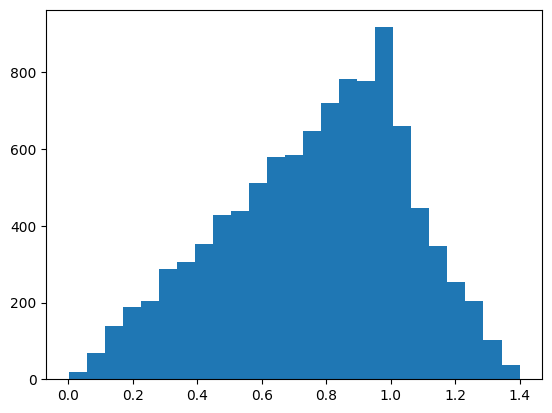

In [19]:

#• Plot a histogram of all the radii 
plt.hist(radius**0.5, bins = 25)
plt.show()


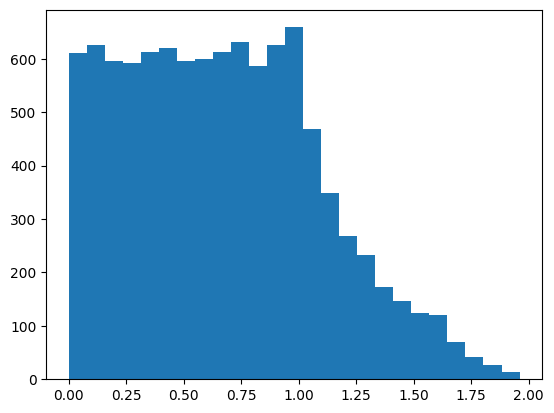

In [20]:
#• Plot a histogram of all the squared radii 
plt.hist(radius, bins = 25)
plt.show()

Write a few sentences (which may include mathematics) explaining why the histograms have the features they do to the left of 1 and to the right of 1. In particular explain why the behavior differs so dramatically for values less than 1


[[0.0060228]]
[[0.33135991]]
[[0.25384542]]


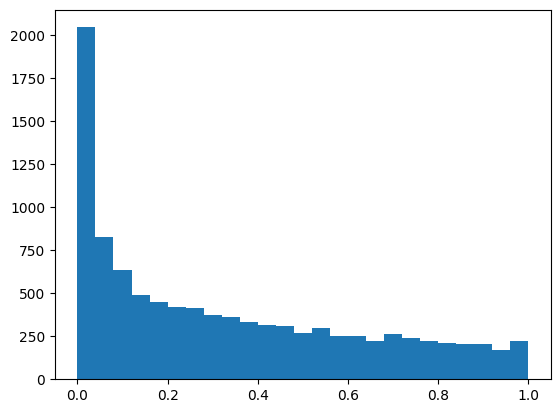

In [21]:
#For the r**2 histogram, it can be explained from the picture of r. Since any number less than 1 their square will converge to 0.
#From the histogram from HW1-1-2, we can find most of value is less than one. Thus, the histogram HW1-1-3 will have more datas that tend to approach to 0.
#For the r histogram, we can first to analyze the uniform distrubution.
#for 1 D case(10000 elements):
one_D_number_array = np.random.uniform(low=-1.0, high=1.0,size=(1, 10000,1, ))
print(one_D_number_array.mean(axis = 1))      #theoratically approaching to 0
print((one_D_number_array**2).mean(axis = 1)) #approaching to 0.33 
#the meanvalue of all x^2, theoratically we are calculating the "(integration x^2)/(total length)" from -1 to 1
#theoratically the mean value for all x^2 from -1 to +1 is 0.33.

#Then we can find the median value of x^2
print(np.median((one_D_number_array**2),axis = 1)) #my one trial : 0.26089879/
#Check the histogram, most of the datas are in the left side.
plt.hist((one_D_number_array**2)[0], bins = 25) #we find most of datas are approaching to left
plt.show()
#as this statistcal result we will find that most of additions for x^2+y^2 are less than 1
#Thus the square root less than 1, the histogram of r leans to left of 1




[[6.20213352e-01]
 [4.16378944e-01]
 [7.10914012e-04]
 ...
 [9.07194627e-01]
 [4.50845155e-01]
 [1.38486468e+00]]
er
[[4.]
 [4.]
 [4.]
 ...
 [4.]
 [4.]
 [0.]]
mean value of sample:3.1228, uncertainty of all sample:1.6550891698032468


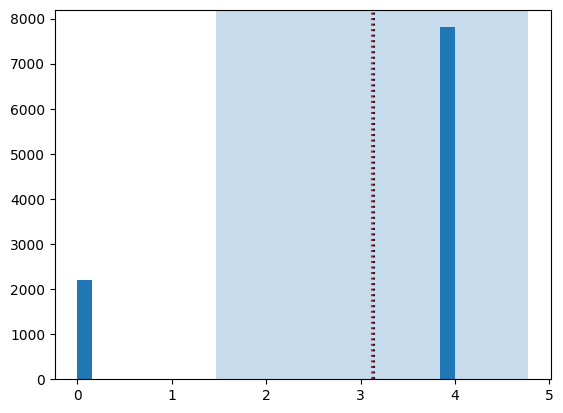

In [26]:

#•Plot a histogram of the indicator variable 4[x^2+y^2<=1],. Draw a vertical line at the mean of all the samples, and indicate the mean ± standard deviation with vertical lines. Indicate the true, known value of π for comparison.
all_sample = radius.copy() 
print(all_sample)
for i in range(len(radius)):
    if all_sample[i] > 1:
        all_sample[i] = 0
    else:
        all_sample[i] = 4
print("er")
print(all_sample)
plt.hist(all_sample, bins=25) #bins: the size of histogram bar
plt.axvline(np.pi, color='black', zorder=1, linestyle=':') #true pi value
plt.axvline(all_sample.mean(), color='red', zorder=1, linestyle=':') #estimate mean pi
plt.axvspan(all_sample.mean()-all_sample.std(), all_sample.mean()+all_sample.std(), alpha=0.25) #range of average
print(f'mean value of sample:{all_sample.mean()}, uncertainty of all sample:{all_sample.std()}')
plt.show()